In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")
from plot_utils import get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
FOLDER = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_classification/simulations/0.2/"
fi, metrics = get_results_data(FOLDER, normalize=False, one_hot=False)
fi_norm, _ = get_results_data(FOLDER, normalize=True, one_hot=False)

def translate_value_names(df):
#     df['index'] = df['index'].map({str(i): F'X{i}' for i in range(5,10)})
    df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation", 'permutation_train' : 'Permutation Train', 'shap_test': 'Shap','shap_train': 'Shap Train'}
    model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CATBOOST', 'Ours' : 'Ours', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'SKLEARN Mean Imputing','XGBOOST_MI' : 'XGBOOST Mean Imputing'}
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    
translate_value_names(fi), translate_value_names(fi_norm)

(None, None)

In [13]:
# fi_norm
fi_norm.groupby(['model','fi_type','index','exp_number']).size()
# fi_norm

model                  fi_type     index  exp_number
CATBOOST               Gain        X0     0             2
                                          1             2
                                          2             2
                                          3             2
                                          4             2
                                                       ..
XGBOOST Mean Imputing  Shap Train  X4     95            2
                                          96            2
                                          97            2
                                          98            2
                                          99            2
Length: 14000, dtype: int64

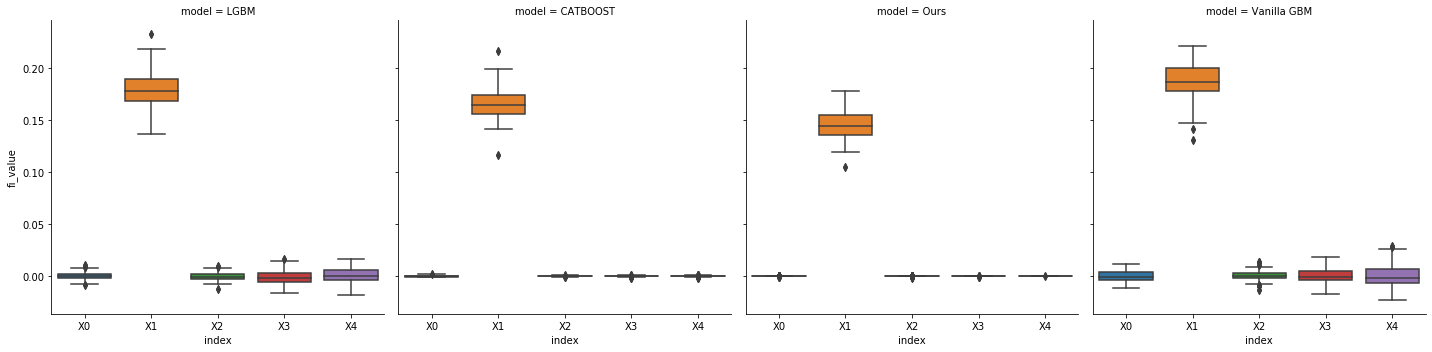

In [3]:
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Permutation')&(fi['model'].isin(['LGBM', 'Vanilla GBM', 'CATBOOST', 'Ours']))])

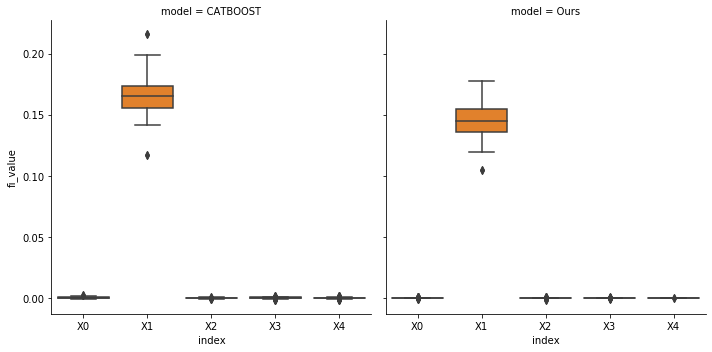

In [4]:
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Permutation')&(fi['model'].isin([ 'CATBOOST', 'Ours']))])

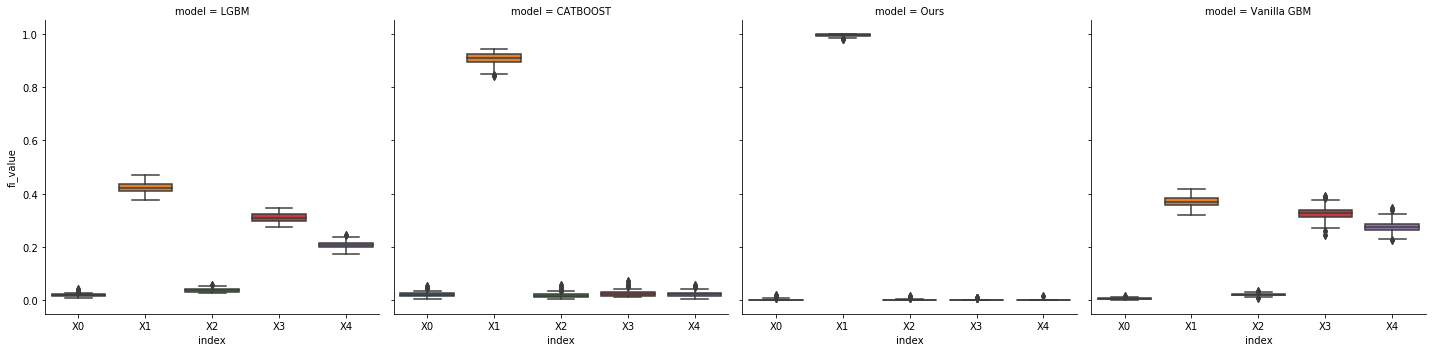

In [5]:
fi_norm = fi_norm.fillna(0)
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi_norm[(fi_norm['fi_type'] == 'Gain')&(fi_norm['model'].isin(['LGBM', 'Vanilla GBM', 'CATBOOST', 'Ours']))])

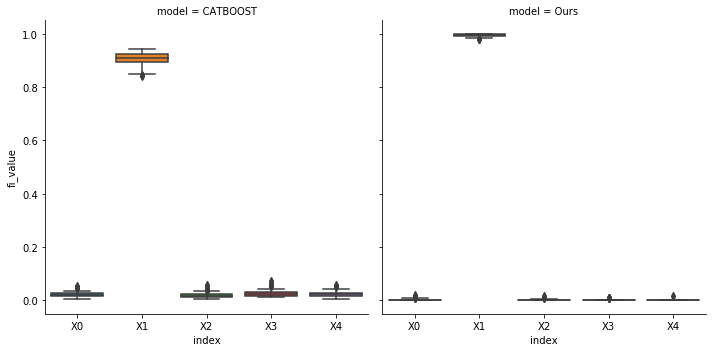

In [6]:
fi_norm = fi_norm.fillna(0)
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi_norm[(fi_norm['fi_type'] == 'Gain')&(fi_norm['model'].isin(['CATBOOST', 'Ours']))])

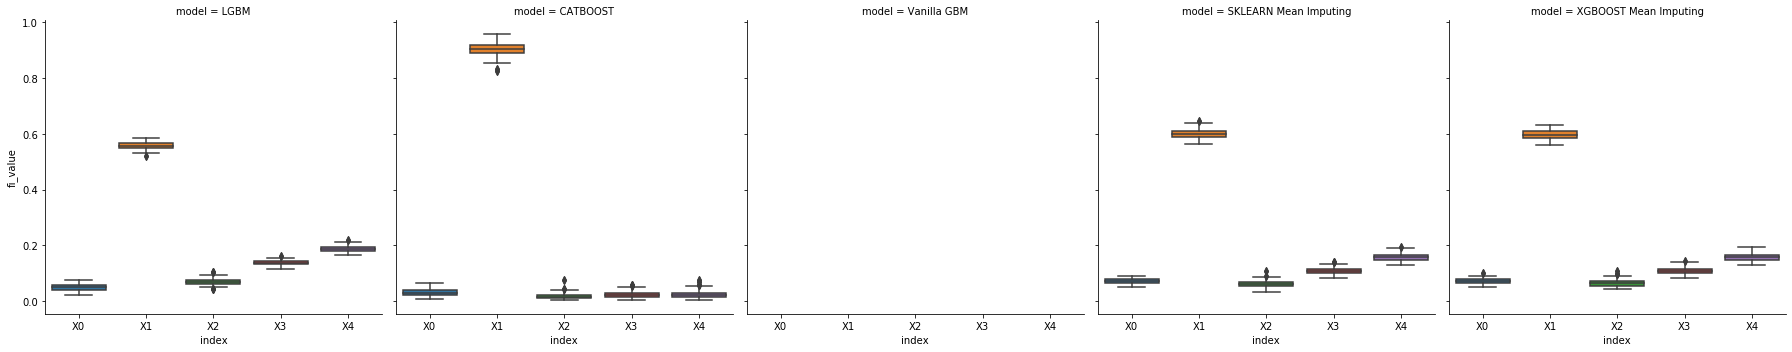

In [7]:
g = sns.catplot(x="index", y="fi_value",kind ='box',
                col="model", data=fi[(fi['fi_type'] == 'Shap')
                                    ])

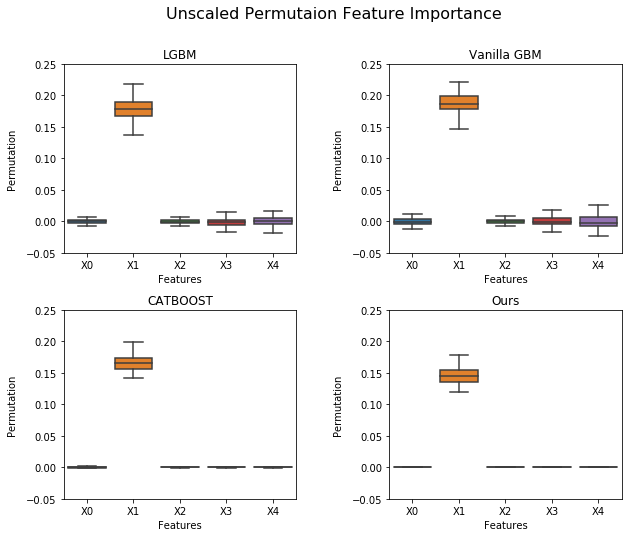

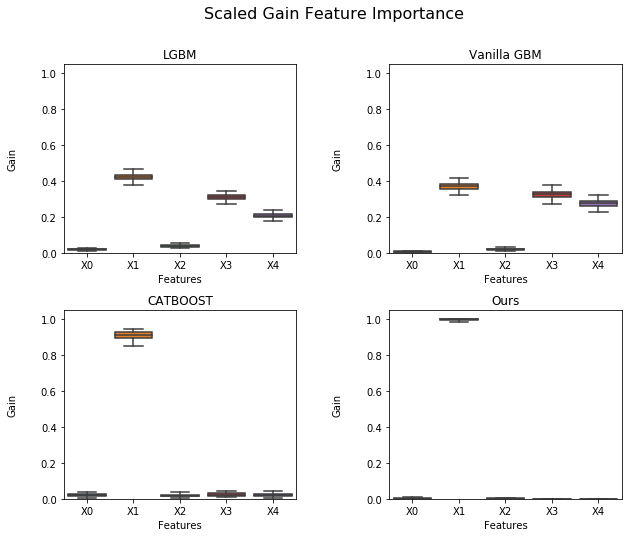

In [8]:
def first_paper_graph(data,title, fi, y_min_zero = False):
    data.columns = ['Features', "Feature Importance Type", fi, 'exp','Model']
    models = ['LGBM', 'Vanilla GBM', 'CATBOOST', 'Ours']
    fig,a =  plt.subplots(2,2,  figsize=(10, 8))
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3)
    get_y_min = lambda x: 0 if y_min_zero else -x
    counter = 0
    for i in range(2):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model) & (data[ "Feature Importance Type"] == fi)]
            ylim = plot_data[fi].apply(np.abs).max()
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(get_y_min(ylim)*1.2,ylim*1.2)
            if fi == 'Permutation':
                a[i][j].set_ylim(-0.05,0.25)
            if fi == 'Gain':
                a[i][j].set_ylim(0,1.05)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.boxplot(x='Features', y=fi,data=plot_data, ax = a[i][j], flierprops = dict(markerfacecolor = '0.50', markersize = 1), showfliers=False)
            counter += 1
    fig.suptitle(title, fontsize=16)
    fig.savefig(F"{title}.png")
    plt.show()
            
            
first_paper_graph(fi,'Unscaled Permutaion Feature Importance', 'Permutation') 
first_paper_graph(fi_norm,'Scaled Gain Feature Importance', 'Gain',True) 

In [9]:
import cv2
import numpy as np

im1 = cv2.imread('Scaled Gain Feature Importance.png')
im2 = cv2.imread('Unscaled Permutaion Feature Importance.png')
cut = 30
im_h = cv2.hconcat([im1[:,cut:], im2[:,cut:]])
cv2.imwrite('0.2_exp.jpg', im_h)


True

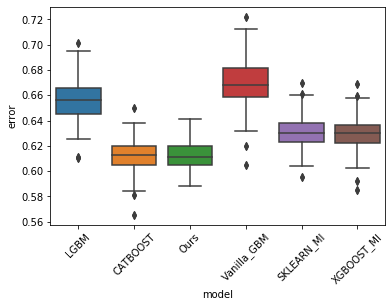

In [11]:
ax = sns.boxplot(x='model', y='error',data=metrics)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()